Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [337]:
NAME = "Christian Mundwiler"
COLLABORATORS = ""

---

# Programming Assignment 3
## On clustering algorithms

## Dataset & Assumptions
* `the-dataset.csv` -- The dataset represents three intertwined spirals, each with approximately 100 two-dimensional data points. Please see a plot of all the points below. The three spirals are intentionally given colors (blue, red and green) to emphasize the obvious 3-clusterings as you can see below. I believe you can appreciate how human eyes/head/brain can distinguish the three clusters quite easily!
    * The file contains three columns, corresponding to the `X` and `Y` coordinates in the Cartesian plane, as well as the cluster number in the third column of the csv file are to denote only the membership of each data point to one of the three clusters. 
    * Please note that the cluster numbers are irrelevant in clustering as it is an unsupervised learning algorithm. 
    * However, as we happen to have received the true clustering results embedded in the dataset, we can leverage this extra information to evaluate the clustering results externally, with a metric affectionately known as the `RandIndex` (an extrinsic metric for evaluation).
    * Just to let you know the intrinsic metric, `sum-of-squared-error` wouldn't use that extra information as it relies on how compact your clustering results are.
* It should be noted that this type of dataset is difficult to cluster! But, I have trust in you; I believe you are clever enough to employ the appropriate clustering algorithm with tricks to properly cluster the dataset.
* You need to explore most of the clustering approaches you learned in the class.

## Restrictions to solve this assignment
* NO LIBRARY FUNCTIONS to do `k-means` and/or `hierarchical clustering` WILL BE ALLOWED.

### The imports
* You are allowed to import additional packages wherever you think necessary. Please write the import statements there, but not here.
* Make sure you don't import/use any package/function that solves either of the k-means, hierarchical clustering, or directly solving a specific task

In [338]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.special import comb
from scipy import mean
from itertools import combinations
from scipy.spatial.distance import cosine
from scipy.spatial.distance import squareform
from scipy.stats import pearsonr

### Loading the-dataset into the workspace

In [339]:
data_df = pd.read_csv('the-dataset.csv', delim_whitespace=True, header=None)
data = np.array(data_df.iloc[:,:-1]) #the dataset
true_membership = np.array(data_df.iloc[:,-1]) #cluster membership of each of the data point

### ScatterPlot utility function
* third column need to represent the color value of points to plot not the z co-ordinate

In [340]:
def scatterPlot (data,membership,centroids=None,plotTitle = "The Dataset"):
    """
    This function draw a scatter plot of data points with cluster membership given.
    
    :param data: a numpy array of data points. 
    :param membership: a list of cluster membership of each of the data points in `data'.
                       a membership value can be any natural number beginning with 1, 2, ...
    :param centroids: a numpy array of centroids (optional)
    
    param plotTitle: The title of the plot. Defaults to "The Dataset"
    
    return nothing. But it draws a scatter plot of the data points and centroids are marked with asterisks.
    """
    data = np.array(data)
    membership = np.array(membership)
    
    n,m = data.shape
    assert m==2 #maximum 2-dim samples due to the fact that it's a scatter plot
    k = len(centroids)
    assert(k<=7) #Maximum 7 clusters due to limitation of available colors
    plt.figure(num=None, figsize=(6, 6), dpi=80)
    colorArray = []
    available_colors = ["","b","g","r","c","m","y","k"]
    for i in membership:
        colorArray.append(available_colors[i])
        
    plt.scatter(data[:,0],data[:,1],facecolor="none", edgecolors=colorArray, s=30)
    if centroids is not None:
        for i in range(len(centroids)):
            plt.scatter(centroids[i,0],centroids[i,1],
                        facecolor="none",edgecolors=available_colors[i+1],marker="*",s=150)
    plt.title(plotTitle)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

# Task A
* Generate a figure from the given dataset belonging to 3 clusters in the Cartesian scatter plot that resembles the following. Please don't copy the figure.
    - It resonates the 3 clusters.
![clustering-scatterplot](figs/cluster_results_x-2.png)
* You may use the utility function `scatterPlot()` defined above.


In [346]:
def getCentroids(data,membership):
    """ this function computes the centroids for the given dataset
    
    :param data: a numpy array of data points. 
    :param membership: a list of cluster membership of each of the data points in `data'.
                       a membership value can be any natural number beginning with 1, 2, ...
    :return centroids: a numpy array of centroids
    """
    
    #n = number of samples in the dataset data
    #m = dimension of each of the n samples
    data = np.array(data)
    membership = np.array(membership)
    n,m = data.shape
    
    centroid_ids = np.unique(membership)
    k = len(centroid_ids) #number of clusters
    centroids = np.zeros((k,m))
    
    # YOUR CODE HERE
    # reshape
    sumCoords = []
    for i in range(k):
        sumCoords.append([])
        
    for i in range(k):
        for j in range(len(data)):
            if (membership[j] == i+1):
                sumCoords[i].append(data[j])

    # find centroids
    for i in range(k):
        totalX = 0
        totalY = 0

        for x, y in sumCoords[i]:
            totalX += x
            totalY += y

        if(len(sumCoords[i]) != 0):
            centX = totalX / len(sumCoords[i])
            centY = totalY / len(sumCoords[i])

        else:
            centX = totalX
            centY= totalY
        centroids[i] = centX, centY

    return centroids

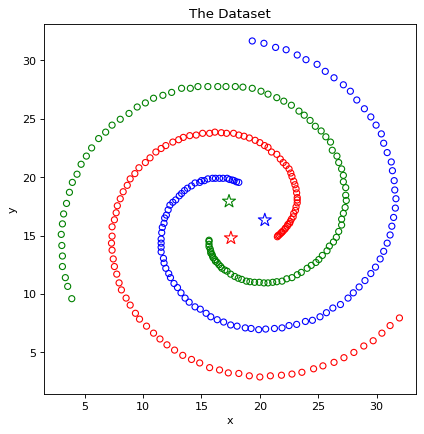

In [347]:
#First compute centroids based on true memberships given in the dataset. Use getCentroid function
#Then, plot the scatterplot of the datapoints with true_membership. Use scatterPlot function

# YOUR CODE HERE
centroids = getCentroids(data, true_membership)
scatterPlot(data, true_membership, centroids)


In [348]:
#Basic check to your solution for this task
assert np.abs(np.sqrt(np.sum( \
    (getCentroids(data,true_membership)[0]-getCentroids(data,true_membership)[1])*\
    (getCentroids(data,true_membership)[0]-getCentroids(data,true_membership)[1]))) + \
              np.sqrt(np.sum( \
    (getCentroids(data,true_membership)[0]-getCentroids(data,true_membership)[2])*\
    (getCentroids(data,true_membership)[0]-getCentroids(data,true_membership)[2]))) + \
              np.sqrt(np.sum( \
    (getCentroids(data,true_membership)[1]-getCentroids(data,true_membership)[2])*\
    (getCentroids(data,true_membership)[1]-getCentroids(data,true_membership)[2])))-9.889345077209153)<1e-4

## Task B
* Define the function: `EuclideanDistance()` based on the specification.
* Details can be found on Slide 23 of lecture [Lecture-PDF](https://drive.google.com/file/d/1uu-LkqTQc-VNrlkhhSdzeKyfThnhLecn/view), [Lecture-Video](https://www.youtube.com/embed/vzlCnJT2sbY)

In [349]:
import math

def EuclideanDistance(x1,x2):
    """
    Calculates Euclidean distance between two data points.
    
    :param x1: a numpy array (or a list) representing a multi-dimensional data point.
    :param x2: a numpy array (or a list) representing a multi-dimensional data point.
    :return : Euclidean distance between the data points x1 and x2.
    """
    distance_val = 0
    
    # YOUR CODE HERE
    distance_val = math.sqrt(((x2[0] - x1[0]) ** 2) + ((x2[1] - x1[1]) ** 2))
    
    return distance_val

In [350]:
#Testing your solution. Please note there are hidden test cases.
assert(np.abs(EuclideanDistance([10, 20],[12, 24])-4.47213595499958)<=1e-4)
assert(np.abs(EuclideanDistance([12, 24],[10, 20])-4.47213595499958)<=1e-4)
assert(np.abs(EuclideanDistance([12, 24],[12, 24])-0.0)<=1e-4)
assert(np.abs(EuclideanDistance([-12, 24],[12, -24])-53.665631459994955)<=1e-4)


## Task C
* Define the function: `CosineSimilarity()` based on the specification.
* Details can be found on Slide 32 of lecture [Lecture-PDF](https://drive.google.com/file/d/1uu-LkqTQc-VNrlkhhSdzeKyfThnhLecn/view), [Lecture-Video](https://www.youtube.com/embed/vzlCnJT2sbY)
* Please note: The cosine similarity always belongs to the interval [-1,1]. For example, two proportional vectors have a cosine similarity of 1, two orthogonal vectors have a similarity of 0, and two opposite vectors have a similarity of -1. 

In [351]:
def CosineSimilarity(x1,x2):
    """
    Calculates cosine similarity between two data points.
    
    :param x1: a numpy array (or a list) representing a multi-dimensional data point.
    :param x2: a numpy array (or a list) representing a multi-dimensional data point.
    :return : cosine similarity between the data points x1 and x2.
    """
    similarity_val = 0
    
    # YOUR CODE HERE
    similarity_val = (np.dot(x1, x2)) / (np.linalg.norm(x1) * np.linalg.norm(x2))
    
    return similarity_val

In [352]:
#Testing your solution. Please note there are few hidden tests
assert(np.abs(CosineSimilarity([10, 20],[12, 24])-0.9999999999999998)<=1e-4)
assert(np.abs(CosineSimilarity([12, 24],[10, 20])-0.9999999999999998)<=1e-4)
assert(np.abs(CosineSimilarity([12, 24],[12, 24])-1.0)<=1e-4)
assert(np.abs(CosineSimilarity([-12, 24],[12, -24])-(-1.0))<=1e-4)

## Task D
* Define the function: `cosineDistance()` based on the specification.
    - Cosine distance is commonly used for the complement of cosine similarity in positive space with the following formula:
    $$
        cosineDistance(x1,x2) = 1 - cosineSimilarity(x1,x2)
    $$
* Please note: Since range of cosine similarity is [-1,1], the range of cosine distance is thus [0,2]
* Also note: the cosine distance is not a proper distance metric as it does not have the triangle inequality property. More on this [https://en.wikipedia.org/wiki/Cosine_similarity](https://en.wikipedia.org/wiki/Cosine_similarity)


In [353]:
def CosineDistance(x1,x2):
    """
    Calculates cosine distance between two data points.
    
    :param x1: a numpy array (or a list) representing a multi-dimensional data point.
    :param x2: a numpy array (or a list) representing a multi-dimensional data point.
    :return : cosine distance between the data points x1 and x2.
    """
    distance = 0
    
    # YOUR CODE HERE
    distance = 1 - CosineSimilarity(x1, x2)
    
    return distance

In [354]:
#Testing your solution. Please note there are few hidden tests.
assert(np.abs(CosineDistance([10, 20],[12, 24])-0.0)<=1e-4)
assert(np.abs(CosineDistance([12, 24],[10, 20])-0.0)<=1e-4)
assert(np.abs(CosineDistance([12, 24],[12, 24])-0.0)<=1e-4)


## Task E
* Define the function: `MinkowskiDistance()` based on the specification.
* Details can be found on Slide 25 of lecture [Lecture-PDF](https://drive.google.com/file/d/1uu-LkqTQc-VNrlkhhSdzeKyfThnhLecn/view), [Lecture-Video](https://www.youtube.com/embed/vzlCnJT2sbY)

In [355]:
from decimal import Decimal
def MinkowskiDistance(x1,x2,p=3):
    """
    Calculates Minkowski distance (of order `p`) between two data points.
    
    :param x1: a numpy array (or a list) representing a multi-dimensional data point.
    :param x2: a numpy array (or a list) representing a multi-dimensional data point.
    :param p: the order of Minkowski distance. defaults to 3.
    :return : Minkowski distance between the data points x1 and x2.
    """
    distance_val = 0
    
    # YOUR CODE HERE
    distance_val = sum(abs(x - y) ** p for x, y in zip(x1, x2)) ** (1/p)
    
    return distance_val

In [356]:
#Let's test your implementation above
assert(np.abs(MinkowskiDistance(x1=[10, 20, 15, 10, 5],x2=[12, 24, 18, 8, 7],p=1)-13.0)<1e-4)
assert(np.abs(MinkowskiDistance(x1=[10, 20, 15, 10, 5],x2=[12, 24, 18, 8, 7],p=2)-6.082762530298219)<1e-4)
assert(np.abs(MinkowskiDistance(x1=[10, 20, 15, 10, 5],x2=[12, 24, 18, 8, 7],p=3)-4.862944131094279)<1e-4)
assert(np.abs(MinkowskiDistance([10, 20],[12, 24],p=1)-6.0)<=1e-4)
assert(np.abs(MinkowskiDistance([10, 20],[12, 24],p=2)-4.47213595499958)<=1e-4)
assert(np.abs(MinkowskiDistance([10, 20],[12, 24],p=3)-4.160167646103808)<=1e-4)
assert(np.abs(MinkowskiDistance([12, 24],[10, 20],p=1)-6.0)<=1e-4)
assert(np.abs(MinkowskiDistance([12, 24],[10, 20],p=2)-4.47213595499958)<=1e-4)
assert(np.abs(MinkowskiDistance([12, 24],[10, 20],p=3)-4.160167646103808)<=1e-4)
assert(np.abs(MinkowskiDistance([12, 24],[12, 24],p=1)-0.0)<=1e-4)
assert(np.abs(MinkowskiDistance([12, 24],[12, 24],p=2)-0.0)<=1e-4)
assert(np.abs(MinkowskiDistance([12, 24],[12, 24],p=3)-0.0)<=1e-4)
assert(np.abs(MinkowskiDistance([-12, 24],[12, -24],p=1)-72.0)<=1e-4)
assert(np.abs(MinkowskiDistance([-12, 24],[12, -24],p=2)-53.665631459994955)<=1e-4)
assert(np.abs(MinkowskiDistance([-12, 24],[12, -24],p=3)-49.92201175324569)<=1e-4)

# Task F
* Define function SSE of clustering results.
* Details can be found on Slide # 52 of lecture [Lecture-PDF](https://drive.google.com/file/d/1fT_kCI-i8eyXdvI10nP_mNUtS4bE5mU8/view), [Lecture-Video](https://www.youtube.com/embed/WZpmaQ5eUus)

In [357]:
def SSE(data,membership):
    """
    Calculates the sum of squared error of a clustering result involving the given data points.
    
    :param data: a numpy array of data points. 
    :param membership: a list of cluster membership of each of the data points in `data'.
                       a membership value can be any natural number beginning with 1, 2, ...
    :return sse_val: value of the sum of squared error based on the definition
    """
    sse_val = 0
    data = np.array(data)
    membership = np.array(membership)
    
    # YOUR CODE HERE
    centroid_ids = np.unique(membership)
    k = len(centroid_ids)

    centers = getCentroids(data, membership)

    # store coords
    dataCoords = [0,0]
    data = np.concatenate((data, membership[:,None]), axis = 1)
    
    for i in range(k):
        for j in data:
            if(j[2] == i+1):
                dataCoords[0], dataCoords[1] = j[0], j[1]
                # find sse
                sse_val += EuclideanDistance(dataCoords, centers[i])**2

    return sse_val



In [358]:
#Now, let's test your SSE function
assert np.abs(SSE([[1,1],[2,2],[3,3],[4,4],[5,5]],[1,1,1,2,2])-5)<1e-4
assert np.abs(SSE([[1,0],[3,0],[8,0],[10,0]],[1,1,2,2])-4)<1e-4
assert np.abs(SSE([[1,0],[3,0],[8,0],[10,0]],[1,1,1,2])-26.0)<1e-4
assert np.abs(SSE([[8,9],[0,8],[8,2]],[1,1,1])-71.33333333333333)<1e-4
assert np.abs(SSE([[8,9],[0,8],[8,2]],[1,1,2])-32.49999999999999)<1e-4
assert np.abs(SSE([[8,9],[0,8],[8,2]],[1,2,1])-24.5)<1e-4


# Task G
* Complete the `RandIndex()` function in the cell below.
* Rand Index (RI) is an external evaluation metric that requires ground true clustering result, unlike the `SSE` metric you defined above.
* Here is the definition of `Rand Index (RI)`:
    - This metric utilizes the ground-true labels of each of the data samples, that is quite unlike for unsupervised learning paradigm. But, here you were given a dataset with truth values associated to each sample, you could take advantage of that, right? RI metric is only applicable to this type of situation. Got it?
    - It is based on a series of decisions, one for each of the $\dfrac{n(n-1)}{2}$ pairs of the $n$ data samples in the dataset. We want to assign two data samples $(a, b)$ to the same cluster if and only if they are similar.
        * **True positive (TP)** decision assigns two similar samples to the same cluster. That is, if the data samples $a$ and $b$ belong to the same cluster according to the ground truth, as well as in predicted clustering, it counts as a TP assignment.
        * **True negative (TN)** decision assigns two dissimilar samples in to two different clusters. That is, if the data samples $a$ and $b$ belong to two different clusters in the ground truth, as well as in predicted clustering, it counts as a TN assignment.
        * The above two cases (i.e., TP and TN) are correctly clustering instances. However, there are two types of errors we can commit:
            - **False Positive (FP)** assigns two dissimilar samples to the same cluster. That is, if the samples $a$, and $b$ belong to different clusters in the ground truth, but your predicted clustering puts them into the same cluster, you accrue one FP assignment.
            - **False Negative (FN)** assigns two similar samples into two different clusters. That is, if the samples $a$, and $b$ belong to the same cluster in the ground truth, but your predicted clustering puts them into two different clusters, you accrue one FN assignment.
* This external evaluation metric, `Rand Index, RI` measures the percentage of clustering decisions that are correct. In simple term, it sounds a lot like accuracy, and we can treat it as the clustering accuracy:
$$
RI=\dfrac{TP+TN}{TP+TN+FP+FN}
$$
* You can observe that cluster indices for each sample in a clustering result do not matter in computing the RI. You can literally use anything to mark the cluster memberships for each of the data samples, and you should get the same Rand Index value.
* For a complete workout example, please look at this webpage [https://nlp.stanford.edu/IR-book/html/htmledition/evaluation-of-clustering-1.html](https://nlp.stanford.edu/IR-book/html/htmledition/evaluation-of-clustering-1.html)

In [359]:
def RandIndex(data, true_membership, predicted_membership):
    """
    Calculates the Rand Index (RI) of a clustering result involving the given data points 
    and their true memberships.
    
    :param data: a numpy array of data points. 
    :param true_membership: a list of ground true cluster membership of each of the data points in `data`.
                       a membership value can be any natural number beginning with 1, 2, ...
    :param predicted_membership: a list of predicted cluster membership of each of the data points in `data`.
                       a membership value can be any natural number beginning with 1, 2, ...
    :return ri_val: value of the rand index of the clustering result.
    """
    ri_val = 0
    data = np.array(data)
    true_membership = np.array(true_membership)
    predicted_membership = np.array(predicted_membership)
    
    # YOUR CODE HERE
    # list of all possible coordinate combinations
    pairs = []
    for i in range(len(true_membership)):
        for j in range(len(true_membership)):
            pairs.append([i, j])
    pairs = np.array(pairs)
    # remove repeated coordinates
    pairs.sort(axis = 1)
    pairs = np.unique(pairs, axis = 0)
    tp, fn, fp, tn  = 0, 0, 0, 0

    # comparisons for rand index
    for i in pairs:
        if(i[0] != i[1]):
            if (true_membership[i[0]] == true_membership[i[1]]):
                if (predicted_membership[i[0]] == predicted_membership[i[1]]):
                    tp += 1
                else:
                    fn +=1
            else:
                if (predicted_membership[i[0]] == predicted_membership[i[1]]):
                    fp += 1
                else:
                    tn += 1
    ri_val = (tp + tn) / (tp + fn + fp + tn)

    return ri_val

In [360]:
#Now, let's test your rand index implementation
assert np.abs(RandIndex([[1,1],[2,2],[3,3],[4,4],[5,5]],[1,1,1,2,2],[1,1,1,2,2])-1.0)<1e-4
assert np.abs(RandIndex([[1,0],[3,0],[8,0],[10,0]],[1,1,2,2],[1,1,2,2])-1.0)<1e-4
assert np.abs(RandIndex([[1,0],[3,0],[8,0],[10,0]],[1,1,1,2],[1,1,1,2])-1.0)<1e-4
assert np.abs(RandIndex([[8,9],[0,8],[8,2]],[1,1,1],[1,1,1])-1.0)<1e-4
assert np.abs(RandIndex([[8,9],[0,8],[8,2]],[1,1,2],[1,1,2])-1.0)<1e-4
assert np.abs(RandIndex([[1,1],[2,2],[3,3],[4,4],[5,5]],[1,1,1,2,2],[3,3,3,5,5])-1.0)<1e-4
assert np.abs(RandIndex([[1,1],[2,2],[3,3],[4,4],[5,5]],[1,1,1,2,2],[1,2,1,3,3])-0.8)<1e-4
assert np.abs(RandIndex([[1,1],[2,2],[3,3],[4,4],[5,5]],[1,1,1,2,2],[1,1,1,1,2])-0.6)<1e-4
assert np.abs(RandIndex([[1,1],[2,2],[3,3],[4,4],[5,5]],[1,1,1,2,2],[1,2,2,2,2])-0.4)<1e-4
assert np.abs(RandIndex([[1],[2],[3],[4],[5],[6],[7],[8],[9],[10],[11],[12],[13],[14],[15],[16],[17]],
            [1,1,1,1,1,1,2,2,2,2,2,2,3,3,3,3,3],
            [3,2,3,3,3,3,3,2,2,2,1,2,3,1,3,1,1])-0.6764705882352942)<1e-4


## Task H
* Implement the k-means clustering algorithm. Please do not use/call any library function that directly solves k-means clustering.
* For distance calculation between pairs of data points use your own `EuclideanDistance()` function that you defined above.
* For centroid calculation, use `getCentroids()` function you defined above.
* Details can be found on Slide # 34 of lecture [Lecture-PDF](https://drive.google.com/file/d/1fT_kCI-i8eyXdvI10nP_mNUtS4bE5mU8/view?usp=sharing), [Lecture-Video](https://www.youtube.com/embed/WZpmaQ5eUus)


In [449]:
def MyKMeans(data, K, max_iter = 300, tol=1e-4, verbose=False, seed=54321):
    """
    K-Means clustering.
    
    :param data: a numpy array of data points. 
    :param K: The number of clusters to form as well as the number of centroids to generate.
    :param max_iter: Maximum number of iterations of the k-means algorithm for a single run.
                     Defaults to 100.
    :param tol:Relative tolerance with regards to Frobenius norm of the difference in 
                the cluster centers of two consecutive iterations to declare convergence.
                Defaults to 1e-4
    :param verbose: a Boolean flag helps in debugging. Defaults to False
    :param seed: Seed value for random number generator. It helps to reproduce the results.
    :return centroids which is a numpy array of shape (K,m), where m is the dimension of each point.
    :return membership: a list of cluster membership of each of the data points in `data'.
                       a membership value can be any natural number beginning with 1, 2, ...
    """
    random.seed(seed)
    data = np.array(data)
    n,m = data.shape #n = num of samples, m = dim of each sample
    
    membership = np.zeros((n,),dtype=int)
    
    #step 1: select K points in the dataset as the initial K centroids
    
    centroids = random.sample(list(data), K)
    
    # YOUR CODE HERE
    iteration = 0
    oldCentroids = []
    diff = 100
    oldCentroids = centroids

    # np arrays for parity checking
    cents = np.array(centroids)
    oldCents = np.zeros((3, 2))

    while (np.not_equal(cents, oldCents).any() and iteration < max_iter):
        count = 0
        # assign membership
        for i in data:
            minDistance = 100
            memb = 0
            # get minimum distance
            for index, element in enumerate(centroids):
                distance = EuclideanDistance(i, element)
                if distance < minDistance:
                    minDistance = distance 
                    memb = index + 1
                           
            # update membersip
            membership = np.insert(membership, count, memb)
            membership = np.delete(membership, count + 1)
            count += 1

        # copy data
        oldCentroids = centroids.copy()
        centroids = getCentroids(data, membership)
        cents = np.array(centroids)
        oldCents = np.array(oldCentroids)

        iteration += 1

    return centroids, membership

In [450]:
MyKMeans(data, 3)

(array([[22.60979381, 23.18298969],
        [10.57863636, 16.18454545],
        [22.72904762, 10.1952381 ]]),
 array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
  

# Task I
* Define the following `task_I()` function that does the following:
    1. Run `MyKMeans()` to perform k-means clustering with `K=3`. Please keep other parameters to their default values.
    2. Run `ScatterPlot()` to draw the result of clustering you got, with title `MyKMeans with k=3, SSE=x, RI=y` and replace `x, y` with the SSE and RI value of the clustering upto 2 digits after decimal point.
* A sample "expected" output is shown below. Please don't copy the image below. LOL

![task-i-kmeans](figs/kmean-task-I.png)


In [451]:
def task_I():
    # YOUR CODE HERE
    K = 3
    centroids_K, membership_K = MyKMeans(data, K)
    sse_K = SSE(data, membership_K)
    sse_K = f"{sse_K:.2f}"
    RI_K = RandIndex(data, true_membership, membership_K)
    RI_K = f"{RI_K:.2f}"
    string = "MyKMeans with k=", K, ", SSE=", sse_K, ", RI=", RI_K
    scatterPlot(data, membership_K, centroids_K, plotTitle = 'MyKMeans with k='+str(K)+', SSE='+str(sse_K)+', RI='+str(RI_K)+'')

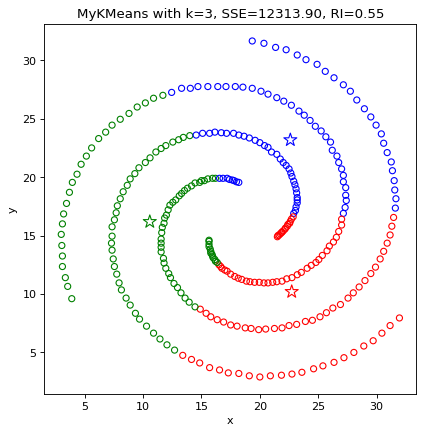

In [452]:
#now call your task_I function below.
# YOUR CODE HERE
task_I()

# Task J
*   Complete the following definition of `MyKMeans_version2()` with extra parameter `n_init` to run your very own `MyKMeans()` that many times and returns the best clustering among all these runs.

In [464]:
def MyKMeans_version2(data, K, max_iter = 300, tol=1e-4, n_init=10, verbose=False, seed=54321, seed_list=None):
    """
    K-Means clustering that runs k-means several times and returns best clustering results of all runs.
    
    :param data: a numpy array of data points. 
    :param K: The number of clusters to form as well as the number of centroids to generate.
    :param max_iter: Maximum number of iterations of the k-means algorithm for a single run.
                     Defaults to 100.
    :param tol:Relative tolerance with regards to Frobenius norm of the difference in 
                the cluster centers of two consecutive iterations to declare convergence.
                Defaults to 1e-4
    :param n_init: Number of times the MyKMeans algorithm will be run with different centroid seeds. 
                    The final results will be the best output of n_init runs based on SSE scores.
                    Defaults to 10.
    :param verbose: a Boolean flag helps in debugging. Defaults to False
    :param seed: Seed value for random number generator. It helps to reproduce the results.
    :param seed_list: List of seed values for each run of MyKMeans to the random number generator. 
                    It helps to reproduce results. len(seed_list)==n_init or seed_list is None in that case
                    n_init number of seeds will be generated.
    :return best_centroids which is a numpy array of shape (K,m), where m is the dimension of each point.
    :return best_membership: a list of cluster membership of each of the data points in `data'.
                       a membership value can be any natural number beginning with 1, 2, ...
    """
    random.seed(seed)
    if seed_list is None:
        seed_list = [random.randint(10000, 60000) for i in range(n_init)]
    assert len(seed_list)==n_init
    
    best_centroids = []
    best_membership = []
    best_sse_val = np.inf
    
    # YOUR CODE HERE
    n,m = data.shape #n = num of samples, m = dim of each sample
    membership = np.zeros((n,),dtype=int)
    
    for index, i in enumerate(seed_list):
        # generate random centroids
        centroids_K_V2, membership_K_V2 = MyKMeans(data, K, seed=i)
        sse_K_V2 = SSE(data, membership_K_V2)
        # sse_K_V2 = f"{sse_K_V2:.2f}"

        # check sse vals
        if (index == 0):
            best_centroids = centroids_K_V2
            best_membership = membership_K_V2
            best_sse_val = sse_K_V2
        elif (sse_K_V2 < best_sse_val):
            best_centroids = centroids_K_V2
            best_membership = membership_K_V2
            best_sse_val = sse_K_V2

    return best_centroids, best_membership

## Task K
* Define the following `task_K()` function that does the following:
    1. Run `MyKMeans_version2()` to perform k-means clustering with `K=3`, and `n_init=10`. Please keep other parameters to their default values.
    2. Run `ScatterPlot()` to draw the result of clustering you got, with title `MyKMeans_version2 with k=3, SSE=x, RI=y` and replace `x, y` with the SSE and RI value of the clustering upto 2 digits after decimal point.
* A sample "expected" output is shown below. Please don't copy the image below. LOL

![task-k-kmeans](figs/kmean-task-k.png)

In [466]:
def task_K():
    K = 3
    centroids_KV2, membership_KV2 = MyKMeans_version2(data, K)
    sse_K = SSE(data, membership_KV2)
    sse_K = f"{sse_K:.2f}"
    RI_K = RandIndex(data, true_membership, membership_KV2)
    RI_K = f"{RI_K:.2f}"
    string = "MyKMeans with k=", K, ", SSE=", sse_K, ", RI=", RI_K
    scatterPlot(data, membership_KV2, centroids_KV2, plotTitle = 'MyKMeans with k='+str(K)+', SSE='+str(sse_K)+', RI='+str(RI_K)+'')


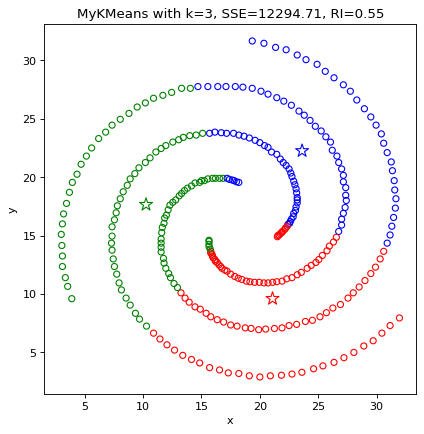

In [467]:
#Now calling your task_K() to see how it looks.

# YOUR CODE HERE
task_K()

# Task L
* Alright, so far so good?
* Now, we will be shifting gears towards `Hierarchical Clustering`. Ready?
* First task would be to completely define the following `linkageDistance()` function that computes distance between two clusters based on the linkage_type and distance metric adopted.
* Details can be found on Slide # 72+ of lecture [Lecture-PDF](https://drive.google.com/file/d/1Tfl4tgX72a-Oy1GN_3SoV9vYgT9MnaWr/view?usp=sharing), [Lecture-Video](https://www.youtube.com/embed/mrCnL9jnsOc)

In [ ]:
def linkageDistance(cluster1,cluster2,linkage_type,distance_metric):
    """
    Computes distance between two clusters based on the linkage_type and distance metric adopted.
    
    :param cluster1: a numpy array of data points
    :param cluster2: a numpy array of data points
    :param linkage_type: a string from the set of linkage type strings: 
                        {"single", "complete", "average"}
    :param distance_metric: a string from the set of distance metric strings: 
                        {"Euclidean", "CosineDistance", "Minkowski_3"}
        referring to Euclidean distance, Cosine distance and Minkowski distance with order,p=3
    :return distance : it returns the linkage distance between the two clusters.
    """
    distance = -1
    assert linkage_type in ["single", "complete", "average"]
    assert distance_metric in ["Euclidean", "CosineDistance", "Minkowski_3"]
    
    # YOUR CODE HERE
    dist = []
    Distance_mat = np.zeros((len(cluster1),len(cluster2)))
    for i in range(Distance_mat.shape[0]):
        for j in range(Distance_mat.shape[0]):
            if i!=j:
                Distance_mat[i,j] = float(EuclideanDistance(samples[i],samples[j]))
            else:
                Distance_mat[i,j] = 10**4
    
    return distance         

In [ ]:
#Few test cases for evaluating your implementation of linkageDistance()
assert np.abs(\
    linkageDistance(cluster1=[[1,1]],
                    cluster2=[[1.5,1.5]],
                    linkage_type='single',
                    distance_metric='Euclidean')-0.7071067811865476) < 1e-4
assert np.abs(\
    linkageDistance(cluster1=[[3,4],[3,3.5]],
                    cluster2=[[5,5]],
                    linkage_type='single',
                    distance_metric='Euclidean')-2.23606797749979) < 1e-4

assert np.abs(\
    linkageDistance(cluster1=[[3,4],[3,3.5]],
                    cluster2=[[1,1],[1.5,1.5]],
                    linkage_type='single',
                    distance_metric='Euclidean')-2.5) < 1e-4

assert np.abs(\
    linkageDistance(cluster1=[[3,4],[3,3.5],[4,4]],
                    cluster2=[[1,1],[1.5,1.5]],
                    linkage_type='single',
                    distance_metric='Euclidean')-2.5) < 1e-4

assert np.abs(\
    linkageDistance(cluster1=[[3,4],[3,3.5],[4,4],[5,5]],
                    cluster2=[[1,1],[1.5,1.5]],
                    linkage_type='single',
                    distance_metric='Euclidean')-2.5) < 1e-4

assert np.abs(\
    linkageDistance(cluster1=[[3,4],[3,3.5]],
                    cluster2=[[1,1],[1.5,1.5]],
                    linkage_type='complete',
                    distance_metric='Euclidean')-3.605551275463989) < 1e-4

assert np.abs(\
    linkageDistance(cluster1=[[3,4],[3,3.5],[4,4]],
                    cluster2=[[1,1],[1.5,1.5]],
                    linkage_type='average',
                    distance_metric='Euclidean')-3.333460655775848) < 1e-4

assert np.abs(\
    linkageDistance(cluster1=[[3,4],[3,3.5],[4,4],[5,5]],
                    cluster2=[[1,1],[1.5,1.5]],
                    linkage_type='single',
                    distance_metric='Minkowski_3')-2.2489707226377074) < 1e-4

assert np.abs(\
    linkageDistance(cluster1=[[3,4],[3,3.5],[4,4],[5,5]],
                    cluster2=[[1,1],[1.5,1.5]],
                    linkage_type='single',
                    distance_metric='CosineDistance')-0.0) < 1e-4


# Task M
* Completely define the following `computeDistanceMatrix()` function that computes distance matrix of clusters based on the linkage_type and distance metric adopted.
    - Please use your own `linkageDistance()` function above.
* Details can be found on Slide # 72+ of lecture [Lecture-PDF](https://drive.google.com/file/d/1Tfl4tgX72a-Oy1GN_3SoV9vYgT9MnaWr/view?usp=sharing), [Lecture-Video](https://www.youtube.com/embed/mrCnL9jnsOc)

In [ ]:
def computeDistanceMatrix(cluster_info, linkage_type,distance_metric, verbose=False):
    """Computes the distance matrix 
    
    :param cluster_info: a dictionary with 2 keys: {'clusters', and 'members'}, where
                    cluster_info['clusters'] is list of cluster of data points which are numpy arrays. 
                    For instance: cluster_info['clusters'] = 
                                    [ [
                                        [1,1],
                                        [2,2]
                                    ], 
                                    [
                                        [3,3],
                                        [4,4],
                                        [5,5],
                                    ],
                                    [
                                        [6,6]
                                    ] ] 
                    it denotes a list of 3 clusters having 2, 3 and 1 data points where each point is 2D.
                    On the other hand, cluster_info['members'] is a list of cluster of indices of the data
                    points.
                    For instance: cluster_info['members'] = 
                                    [ 
                                        [0,1],
                                        [2,3,4],
                                        [5]
                                    ]
                    denotes the list of 3 clusters having 2,3,1 data points whose original indices are
                    [0, 1, 2, 3, 4, 5].
    :param linkage_type: a string from the set of linkage type strings: 
                        {"single", "complete", "average"}
    :param distance_metric: a string from the set of distance metric strings: 
                        {"Euclidean", "CosineDistance", "Minkowski_3"}
        referring to Euclidean distance, Cosine distance and Minkowski distance with order,p=3
    :return distance_matrix: a numpy square matrix containing the distance matrix for the given clusters.
    :return min_distance: minimum distance value in the computed distance matrix
    :return min_clust1: index of the first cluster that yielded minimum distance
    :return min_clust2: index of the second cluster that yielded minimum distance.
        
    """
    n_clusters = len(cluster_info['clusters']) #number of cluster
    #if verbose: print('n_clusters = {}'.format(n_clusters))
    distance_matrix = np.zeros((n_clusters,n_clusters))
    min_distance = np.inf
    min_clust1 = []
    min_clust2 = []
    min_i = -1
    min_j = -1
    
    # YOUR CODE HERE
    raise NotImplementedError()
    return distance_matrix, min_distance, min_i, min_j, min_clust1, min_clust2

In [ ]:
#test case to evaluate your implementation of computeDistanceMatrix()
dMat,min_d,min_i,min_j,min_clust1,min_clust2 = \
    computeDistanceMatrix(cluster_info={\
                        'clusters':[ [[1,1]], [[1.5,1.5]], [[5,5]], [[3,4]], [[4,4]], [[3,3.5]] ],\
                        'members':[[0],[1],[2],[3],[4],[5]]},\
                          linkage_type='single',
                          distance_metric='Euclidean'
                         )
assert np.abs(np.sqrt(np.sum(dMat**2))-16.80773631397161)<1e-4
assert np.abs(min_d-0.5)<1e-4
assert (min_i,min_j)==(3,5)
assert (min_clust1,min_clust2)==([3],[5])


dMat,min_d,min_i,min_j,min_clust1,min_clust2 = \
    computeDistanceMatrix(cluster_info={\
                        'clusters':[ [[1,1]], [[1.5,1.5]], [[5,5]], [[3,4],[3,3.5]], [[4,4]] ],\
                        'members':[[0],[1],[2],[3,5],[4]]},\
                          linkage_type='single',
                          distance_metric='Euclidean'
                         )
assert np.abs(np.sqrt(np.sum(dMat**2))-14.966629547095767)<1e-4
assert np.abs(min_d-0.7071067811865476)<1e-4
assert (min_i,min_j)==(0, 1)
assert (min_clust1,min_clust2)==([0], [1])

dMat,min_d,min_i,min_j,min_clust1,min_clust2 = \
    computeDistanceMatrix(cluster_info={\
                        'clusters':[ [[1,1],[1.5,1.5]], [[5,5]], [[3,4],[3,3.5]], [[4,4]] ],\
                        'members':[[0,1],[2],[3,5],[4]]},\
                          linkage_type='single',
                          distance_metric='Euclidean'
                         )
assert np.abs(np.sqrt(np.sum(dMat**2))-10.124228365658293)<1e-4
assert np.abs(min_d-1.0)<1e-4
assert (min_i,min_j)==(2,3)
assert (min_clust1,min_clust2)==([3, 5], [4])

dMat,min_d,min_i,min_j,min_clust1,min_clust2 = \
    computeDistanceMatrix(cluster_info={\
                        'clusters':[ [[1,1],[1.5,1.5]], [[5,5]], [[3,4],[3,3.5],[4,4]] ],\
                        'members':[[0,1],[2],[3,4,5]]},\
                          linkage_type='single',
                          distance_metric='Euclidean'
                         )
assert np.abs(np.sqrt(np.sum(dMat**2))-8.093207028119323)<1e-4
assert np.abs(min_d-1.4142135623730951)<1e-4
assert (min_i,min_j)==(1, 2)
assert (min_clust1,min_clust2)==([2], [3, 4, 5])


dMat,min_d,min_i,min_j,min_clust1,min_clust2 = \
    computeDistanceMatrix(cluster_info={\
                        'clusters':[ [[1,1],[1.5,1.5]],[[3,4],[3,3.5],[4,4],[5,5]] ],\
                        'members':[[0,1],[2,3,4,5]]},\
                          linkage_type='single',
                          distance_metric='Euclidean'
                         )
assert np.abs(np.sqrt(np.sum(dMat**2))-3.5355339059327378)<1e-4
assert np.abs(min_d-2.5)<1e-4
assert (min_i,min_j)==(0, 1)
assert (min_clust1,min_clust2)==([0, 1], [2, 3, 4, 5])


# Task N
* Complete the following `hierarchical_agglomerative_clustering()` function that follows the given input/output specifications.
    - Please use `computeDistanceMatrix()` function that you defined above.
* Details can be found on Slide # 72+ of lecture [Lecture-PDF](https://drive.google.com/file/d/1Tfl4tgX72a-Oy1GN_3SoV9vYgT9MnaWr/view?usp=sharing), [Lecture-Video](https://www.youtube.com/embed/mrCnL9jnsOc)


In [ ]:
def hierarchical_agglomerative_clustering(data, K, linkage_type, distance_metric, verbose=False):
    """
    Perform hierarchical clustering using agglomerative strategy on the dataset based on the 
    given linkage type and distance metric.
    
    :param data: a numpy array of data points. 
    :param K: The number of clusters to form as well as the number of centroids to generate.
    
    :param linkage_type: a string from the set of linkage type strings: 
                        {"single", "complete", "average"}
    :param distance_metric: a string from the set of distance metric strings: 
                        {"Euclidean", "CosineDistance", "Minkowski_3"}
        referring to Euclidean distance, Cosine distance and Minkowski distance with order,p=3
    :return K_membership: a list of K cluster membership of each of the data points in `data' by cutting
                        the computed dendrogram at a certain height. Please note a membership value can 
                        be any natural number beginning with 1, 2, ...
    :return first_distance_matrix: first computed distance matrix of the given data points.
    :return cophenetic_matrix: cophenetic matrix of the given data points based on the merge events.
    :return cluster_merge_log: returns a list of cluster merge events. Make sure each item of the list 
                        contains the following (in the following order):
                        i) min_dist : the distance where two clusters were merged
                        ii) min_clust1: the cluster1 in question who merged with ...
                        iii) min_clust2: the cluster2.
                        iv) clusters: a list of existing clustering of the original datapoints.
                            For example: [[2], [0, 1], [3, 4, 5]]] for clusters denotes so far you've
                            3 clusters and the first cluster having the data point 2 as the only member,
                            second cluster having datapoints 0 and 1 as members,
                            third cluster having data points 3, 4, and 5 as members.
                        Please note: * you need to log before the merging event.
                                     * first 3 items in the log list can be retrieved from each 
                                       computeDistanceMatrix() call.
                        
    """
    data = np.array(data)
    n,m = data.shape #n = number of points, m=dimension of a point
    
    K_membership = np.zeros((n,),dtype=int) #cluster membership array. Values can be anything 1,2,...K
    
    first_distance_matrix = np.zeros((n,n)) #first distance matrix involving n points.
    
    cophenetic_matrix = np.zeros_like(first_distance_matrix) #the cophenetic matrix
    
    cluster_merge_log = [] #the cluster merge log. Please note it logs an entry right before merging.
    
    
    # YOUR CODE HERE
    raise NotImplementedError()
    return K_membership, first_distance_matrix, cophenetic_matrix, cluster_merge_log
 

In [ ]:
#Evaluating your hierarchical_agglomerative_clusteriong() implementation
membership, distance_matrix, cophenetic_matrix, cluster_merge_log = \
        hierarchical_agglomerative_clustering(data, 
                                              K=3, 
                                              linkage_type="single",
                                              distance_metric="Euclidean",
                                              verbose=False
                                             )
assert (membership[0],membership[150],membership[-1])==(1,2,3)
assert np.abs(np.sqrt(np.sum(distance_matrix**2))-4415.120866975218)<1e-4
assert np.abs(np.sqrt(np.sum(cophenetic_matrix**2))-971.1593612790847)<1e-4
assert len(cluster_merge_log)==311
assert np.abs(cluster_merge_log[0][0]-0.07071067811865325)<1e-4
assert np.abs(cluster_merge_log[-1][0]-3.8209946349085593)<1e-4

## Task O
* Complete the following `CCC()` function that computes the cophenetic correlation coefficient given the computed distance matrix and cophenetic matrix returned from the `hierarchical_agglomerative_clustering()` function call.
    - please watch carefully the last part of the lecture video for the definition and examples on how to calculate the cophenetic correlation coefficient.
* Details can be found on Slide # 72+ of lecture [Lecture-PDF](https://drive.google.com/file/d/1Tfl4tgX72a-Oy1GN_3SoV9vYgT9MnaWr/view?usp=sharing), [Lecture-Video](https://www.youtube.com/embed/mrCnL9jnsOc)


In [ ]:
def CCC(cophenetic_matrix,distance_matrix):
    """
    Compute cophenetic correlation coefficient from the given cophentic and distance matrices.
    :param coephenetic_matrix: cophenetic matrix of data points based on hierarchical agglomerative clustering.
    :param distance_matrix:  distance matrix of the data points.
    :return ccc_val: the cophenetic correlation coefficient value based on its definition.
    
    """
    ccc_val = 0
    
    # YOUR CODE HERE
    raise NotImplementedError()
    
    return ccc_val

In [ ]:
#evaluating your CCC implementation. Please note there might be hidden tests
test_data = np.array([[1,1],[1.5,1.5],[5,5],[3,4],[4,4],[3,3.5]])
m, d, c, l = hierarchical_agglomerative_clustering(test_data, 2,"single","Euclidean")
assert np.abs(CCC(c,d)-0.86399159)<1e-4


# Task P
* Implement the task_P() function to do the following:
    1. perform hierarchical agglomerative clustering on the given dataset with single linkage strategy and Euclidean distance as the distance metric, and finally cut your computed dendrogram to have 3 clusters (i.e., K=3).
    2. Draw the scatterplot of the datapoints using your computed membership. Run `ScatterPlot()` to draw the result of clustering you got, with title `Hierarchical[single,Euclidean] with k=3, SSE=x, RI=y` and replace `x, y` with the SSE and RI value of the clustering upto 2 digits after decimal point.
* A sample "expected" output is shown below. Please don't copy the image below. LOL

![task-p-single-euclid-k=3](figs/hierarchical_single_euclid_k_3.png)


In [ ]:
def task_P(data):
    # YOUR CODE HERE
    raise NotImplementedError()


In [ ]:
#Now, call task_P with the given data

# YOUR CODE HERE
raise NotImplementedError()

# Task Q
* Implement the task_Q() function to do the following:
    1. perform hierarchical agglomerative clustering on the given dataset with average linkage strategy and Minkowski_3 distance as the distance metric, and finally cut your computed dendrogram to have 3 clusters (i.e., K=3).
    2. Draw the scatterplot of the datapoints using your computed membership. Run `ScatterPlot()` to draw the result of clustering you got, with title `Hierarchical[average,Minkowski_3] with k=3, SSE=x, RI=y` and replace `x, y` with the SSE and RI value of the clustering upto 2 digits after decimal point.
* A sample "expected" output is shown below. Please don't copy the image below. LOL

![task-p-single-euclid-k=3](figs/hierarchical_avg_minkowski_3_k_3.png)


In [ ]:
def task_Q(data):
    # YOUR CODE HERE
    raise NotImplementedError()


In [ ]:
#Now call task_Q

# YOUR CODE HERE
raise NotImplementedError()

## Task R
* Write down your answer in the following cell this question:

Question: Which of the two clustering algorithm (k-means and hierarchical) was trained faster? Please explain your answer.

In [ ]:
question_R = "Which of the two clustering algorithm (k-means and hierarchical) was trained faster? Please Explain your answer."
answer_R = ""

#Please assign a proper answer to variable `answer_R`
# YOUR CODE HERE
raise NotImplementedError()

## Task S
* Write down your answer in the following cell this question:

Question: Which of the two clustering algorithm (k-means and hierarchical) was performed best in clustering the data points? Please explain your answer.

In [ ]:
question_S = "Which of the two clustering algorithm (k-means and hierarchical) was performed best in clustering the data points? Please Explain your answer."
answer_S = ""

#Please assign a proper answer to variable `answer_S`
# YOUR CODE HERE
raise NotImplementedError()